In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.00

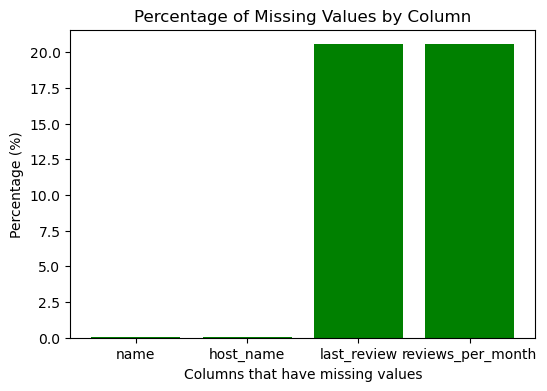

In [2]:
df = pd.read_csv('airbnb.csv')
print(df.isnull().sum()) # print the number of missing values in each column

missing_data = df.isnull().mean() * 100
print(missing_data) # print the percentage of missing values in each column

print(missing_data[missing_data > 0]) # print the columns with missing values
plt.figure(figsize=(6, 4))
plt.bar(missing_data[missing_data > 0].index, missing_data[missing_data > 0], color='green')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns that have missing values')
plt.show()

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id         

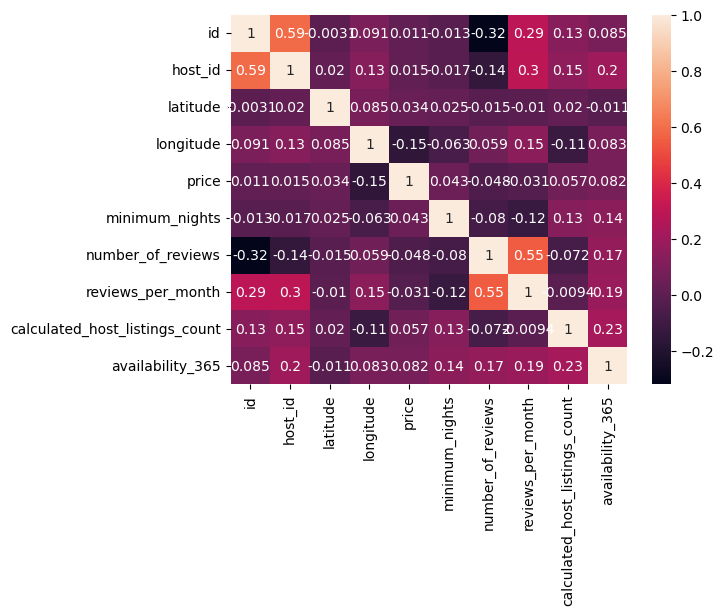

In [4]:
correlationMatrix = df.select_dtypes(include=["int","float"]).corr()
print(correlationMatrix) # print the correlation matrix

seaborn.heatmap(correlationMatrix,annot=True)
plt.show() # Plot the correlation matrix


In [5]:
df.fillna({'name': df['name'].mode()[0]}, inplace=True) 
df.fillna({'host_name': df['host_name'].mode()[0]}, inplace=True)
df.fillna({'last_review': df['last_review'].mode()[0]}, inplace=True)
df.fillna({'reviews_per_month': df['reviews_per_month'].median()}, inplace=True)

# drop the columns that are not needed for clustering
df = df.drop (columns=['id', 'name', 'host_id', 'host_name', 'last_review'])

In [6]:
encoder = OneHotEncoder(sparse_output=False)
newArray = encoder.fit_transform(df[["neighbourhood_group", "neighbourhood", "room_type"]])
cols = encoder.get_feature_names_out()
newDf = pd.DataFrame(newArray,columns=cols,index=df.index)
newDataFrame = pd.concat([df.drop(columns=["neighbourhood_group", "neighbourhood", "room_type"],axis=1),newDf],axis=1)
print(newDataFrame.head())

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.72                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
0                        0.0                           1.0  ...   
1           

In [7]:
for col in newDataFrame.columns:
    maen = newDataFrame[col].mean()
    std = newDataFrame[col].std()
    newDataFrame[col] = (newDataFrame[col] - maen) / std
print(newDataFrame.head())

   latitude  longitude     price  minimum_nights  number_of_reviews  \
0 -1.493834  -0.437648 -0.015493       -0.293993          -0.320410   
1  0.452431  -0.684632  0.300970       -0.293993           0.487660   
2  1.468384   0.222494 -0.011329       -0.196482          -0.522428   
3 -0.803389  -0.164448 -0.265332       -0.293993           5.538099   
4  1.275647   0.177214 -0.302808        0.144805          -0.320410   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0          -0.676544                       -0.034716          1.916231   
1          -0.564766                       -0.156103          1.840256   
2          -0.341208                       -0.186450          1.916231   
3           2.236279                       -0.186450          0.617059   
4          -0.748872                       -0.186450         -0.856856   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
0                  -0.151069                      1.196693  .

In [8]:
pca = PCA(n_components=0.95)
ReductionDf = pca.fit_transform(newDataFrame)
print(ReductionDf.shape) # print the shape of the reduced data

(48895, 215)


Train Data shape: (29337, 215)
Validation Data shape: (9779, 215)
Test Data shape: (9779, 215)


In [29]:
class KMeans:
    def __init__(self, k, max_iter=100, tol=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None

    # Choose # of clusters desired, k. ==> Randomly select k points from the dataset as initial centroids
    def initializeCentroids(self, X):
        randomPoints = np.random.choice(X.shape[0], size=self.k, replace=False)# Used replace=False to make sure that centroids are unique
        self.centroids = X[randomPoints]
    
    # Assign each point to its closest centroids
    def assignPointsToCentroids(self, X):
        nearestCentroid = []
        for i in X:
            distances = []
            for j in self.centroids:
                euclideanDistance = np.linalg.norm(i - j)
                distances.append(euclideanDistance)
            nearestCentroidIndex = np.argmin(distances)
            nearestCentroid.append(nearestCentroidIndex)
        self.labels = np.array(nearestCentroid)
    
    # Re-compute centroids
    def recomputeCentroids(self, X):
        for i in range(self.k):
            dataPoints = X[self.labels == i]
            if len(dataPoints) > 0:
                self.centroids[i] = dataPoints.mean(axis=0)
            else:
                self.centroids[i] = self.centroids[i]

    # check convergence
    def checkSignificantChange(self, oldCentroids):
        difference = np.abs(self.centroids - oldCentroids)
        boolean = np.all(difference < self.tol)
        return boolean
    
    # Fit the model to the data
    def fit(self, X):
        self.initializeCentroids(X)
        for i in range(self.max_iter):
            self.assignPointsToCentroids(X)
            oldCentroids = self.centroids.copy()
            self.recomputeCentroids(X)
            if self.checkSignificantChange(oldCentroids):
                print(f"Converged after {i+1} iterations.")
                break

    # Predict the cluster labels for new data points
    def predict(self, X):
        self.assignPointsToCentroids(X)
        return self.labels
    
    # getters to get the centroids and labels
    def getCentroids(self):
        return self.centroids
    
    def getLabels(self):
        return self.labels
    


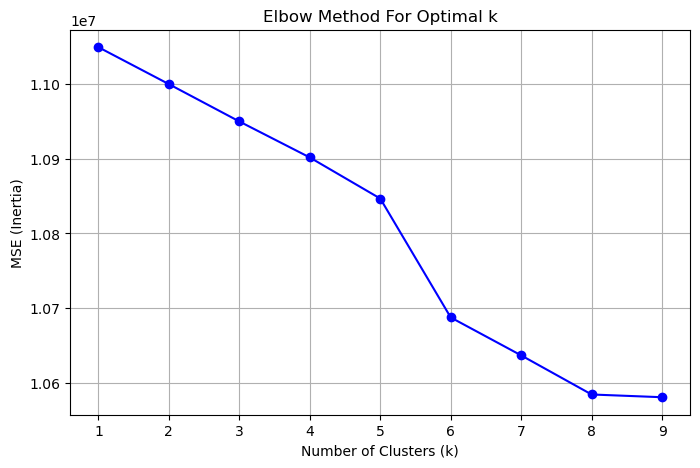

In [30]:
from sklearn.cluster import KMeans as SKMeans
mse = []
# test for k = 1 to 10
for i in range(1,10):
    skmeans = SKMeans(n_clusters=i, random_state=42)
    skmeans.fit(ReductionDf)
    mse.append(skmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1,10), mse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('MSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

Converged after 23 iterations.


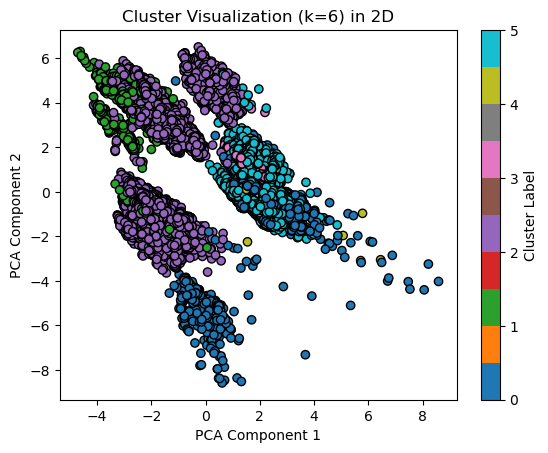

In [39]:
bestK = 6
finalKMeanns = KMeans(bestK)
finalKMeanns.fit(ReductionDf)
labels = finalKMeanns.predict(ReductionDf)
pca1 = PCA(n_components=2)
reducedToTwoDimension = pca1.fit_transform(ReductionDf)
scatter = plt.scatter(reducedToTwoDimension[:, 0], reducedToTwoDimension[:, 1], c=labels, cmap="tab10", edgecolors='k')
plt.title('Cluster Visualization (k=6) in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [32]:
class bisectingKMeans:
    def __init__(self, k, max_iter=100, tol=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = []
        self.labels = None

    def sse(self, cluster):
        centroid = np.mean(cluster, axis=0)
        distances = np.linalg.norm(cluster - centroid, axis=1)
        totalSSE = np.sum(distances**2)
        return totalSSE
    
    def fit(self, X):
        clusters = [X]
        while len(clusters) < self.k:
            sseList = [self.sse(cluster) for cluster in clusters]
            highestSSEIndex = np.argmax(sseList)
            highestSSECluster = clusters.pop(highestSSEIndex)
            bkmeans = KMeans(k=2, max_iter=self.max_iter, tol=self.tol)
            bkmeans.fit(highestSSECluster)
            newClusters = [highestSSECluster[bkmeans.getLabels() == 0], highestSSECluster[bkmeans.getLabels() == 1]]
            clusters.extend(newClusters)
            self.centroids.extend(bkmeans.centroids)
        labels = []
        for cluster in clusters:
            labels.append(bkmeans.predict(cluster))
        self.labels = np.concatenate(labels)

    def predict(self, X):
        labels = []
        for i in X:
            distances = []
            for j in self.centroids:
                euclideanDistance = np.linalg.norm(i - j)
                distances.append(euclideanDistance)
            labels.append(np.argmin(distances))
        self.labels = np.array(labels)
        return self.labels

Converged after 2 iterations.
Converged after 5 iterations.
Converged after 8 iterations.
Converged after 2 iterations.
Converged after 2 iterations.


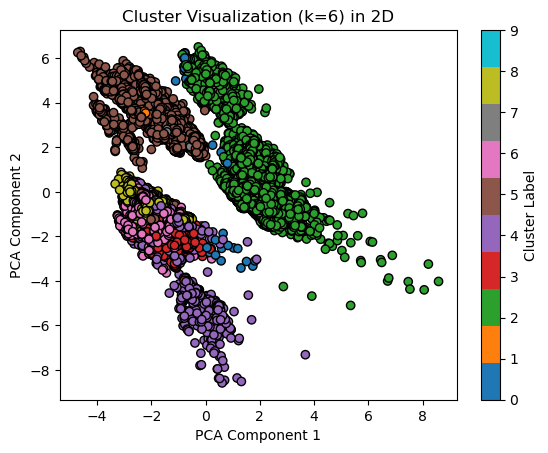

In [33]:
bisectingkmeans = bisectingKMeans(bestK)
bisectingkmeans.fit(ReductionDf)
bklabels = bisectingkmeans.predict(ReductionDf)
pca = PCA(n_components=2)
reducedToTwoDimensionBK = pca.fit_transform(ReductionDf)
scatter = plt.scatter(reducedToTwoDimension[:, 0], reducedToTwoDimension[:, 1], c=bklabels, cmap="tab10", edgecolors='k')
plt.title('Cluster Visualization (k=6) in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()